In [1]:
import numpy as np 
import pandas as pd 
import os


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
df = pd.read_csv('xrp_all_time.csv')
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-09-2019,0.244023,0.245047,0.240754,0.242571,9.782115e+08,10449975028
1,27-09-2019,0.243712,0.246306,0.236745,0.244021,1.277746e+09,10512410924
2,26-09-2019,0.246448,0.250457,0.234037,0.243784,1.387714e+09,10502200054


In [4]:
print (df.describe())

              Open         High          Low        Close        Volume  \
count  2247.000000  2247.000000  2247.000000  2247.000000  2.102000e+03   
mean      0.186090     0.195449     0.176407     0.186210  3.462034e+08   
std       0.324560     0.350688     0.299543     0.324575  7.860493e+08   
min       0.002809     0.003082     0.002802     0.002810  8.316000e+03   
25%       0.006490     0.006637     0.006357     0.006489  4.273172e+05   
50%       0.012961     0.013363     0.012325     0.012990  2.064395e+06   
75%       0.304681     0.312534     0.298312     0.304624  3.607105e+08   
max       3.360000     3.840000     3.120000     3.380000  9.110440e+09   

         Market Cap  
count  2.247000e+03  
mean   7.317538e+09  
std    1.274446e+10  
min    2.196991e+07  
25%    2.020233e+08  
50%    2.865701e+08  
75%    1.266335e+10  
max    1.308535e+11  


In [5]:
print (df.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object


In [6]:
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,28-09-2019,0.242571
1,27-09-2019,0.244021
2,26-09-2019,0.243784


In [7]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
01-01-2014  0.026944
01-01-2015  0.024390
01-01-2016  0.005955
               Close
Date                
31-12-2016  0.006449
31-12-2017  2.300000
31-12-2018  0.352706


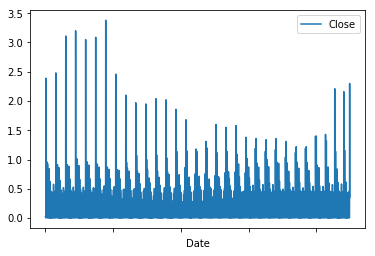

In [8]:
#plot
df_ts.plot()

In [9]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
       
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [10]:
# Stationarity with Dickey Fuller Test 
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                -1.047320e+01
p-value                        1.268523e-18
#lags Used                     2.400000e+01
Number of Observations Used    2.222000e+03
Critical Value (1%)           -3.433296e+00
Critical Value (5%)           -2.862842e+00
Critical Value (10%)          -2.567463e+00
dtype: float64


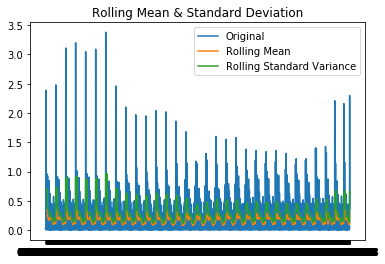

In [11]:
#Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()
plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)